In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("lstm_data.csv")
#data = data.drop(['week','Unnamed: 0'],axis=1)
data = data['region1']
data

0       0
1       0
2       1
3       0
4       0
       ..
2622    0
2623    0
2624    0
2625    0
2626    0
Name: region1, Length: 2627, dtype: int64

In [2]:
data = data
data = np.array(data)
data

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [3]:
import numpy as np
def splitSequence(seq, n_steps):
    
    #Declare X and y as empty list
    X = []
    y = []
    
    for i in range(len(seq)):
        #get the last index
        lastIndex = i + n_steps
        
        #if lastIndex is greater than length of sequence then break
        if lastIndex > len(seq) - 1:
            break
            
        #Create input and output sequence
        seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]
        
        #append seq_X, seq_y in X and y list
        X.append(seq_X)
        y.append(seq_y)
        pass
    #Convert X and y into numpy array
    X = np.array(X)
    y = np.array(y)
    
    return X,y 
    
    pass

In [4]:
n_steps = 500
X, y = splitSequence(data, n_steps)

In [5]:
print(X.shape,y.shape)

(2127, 500) (2127,)


In [6]:
print(X[0],y)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [7]:
n_features = 1
print(y.shape)

(2127,)


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
mod_dnn_r11 = tf.keras.Sequential()
mod_dnn_r11.add(layers.Dense(50, activation='sigmoid'))
mod_dnn_r11.add(layers.Dropout(0.2))
mod_dnn_r11.add(layers.Dense(100,activation='softmax'))
mod_dnn_r11.add(layers.Dense(1))

In [38]:
mod_dnn_r11.layers


In [39]:
mod_dnn_r11.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])


In [ ]:
mod_dnn_r11.fit(X, y, epochs=50, verbose=1)


Epoch 1/50
50/67 [=====================>........] - ETA: 0s - loss: 0.0463 - accuracy: 0.9519

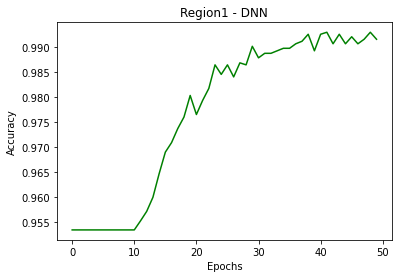

In [13]:
import numpy as np
import matplotlib.pyplot as plt
xaxis = np.arange(0, 50)
res = np.array([0.9535,0.9535, 0.9535,0.9535,0.9535,0.9535,0.9535,0.9535,0.9535,0.9535,0.9535,0.9553,0.9572,0.9600,0.9647,0.9690
,0.9709,0.9737,0.9760,0.9803,0.9765,0.9793,0.9817,0.9864,0.9845,0.9864,0.9840,0.9868,0.9864,0.9901,0.9878,0.9887,0.9887,0.9892,0.9897
,0.9897,0.9906,0.9911,0.9925,0.9892,0.9925,0.9929,0.9906,0.9925,0.9906,0.9920,0.9906,0.9915,0.9929,0.9915])
plt.title("Region1 - DNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(xaxis, res, color ="green")
plt.show()

In [16]:
p = X[-10:]


In [57]:
mod_dnn_r1.predict(p)

array([[-0.01280275],
       [ 0.00516233],
       [-0.01591285],
       [ 0.00509562],
       [ 0.00099282],
       [-0.01165421],
       [-0.00761004],
       [ 0.00587367],
       [ 0.00616683],
       [ 0.0068664 ]], dtype=float32)

In [58]:
y[-10:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)